In [5]:
cd PycharmProjects/lasagna

/Users/feldman/PycharmProjects/lasagna


In [9]:
# imports
import numpy as np
import json
from itertools import product
from collections import defaultdict
from pprint import pprint as pp

from lasagna.conditions_ import (load_sheet, find_comparisons,
                                 find_comparisons_second_order,
                                 get_named_wells,
                                 get_named_comparisons)

from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
wells, conditions, cube = load_sheet('demo sheet')
comparisons = find_comparisons(cube)
comparisons2 = find_comparisons_second_order(cube)

named_wells = get_named_wells(wells, conditions)

named_comparisons = get_named_comparisons(comparisons, conditions)
named_comparisons2 = get_named_comparisons(comparisons2, conditions)

In [11]:
print 'experimental conditions:\n'
print (json.dumps(conditions, indent=4))

print '-'*50, '\n'

print (cube>0).sum(), ' out of ', cube.size, 'combinations tested:\n'
pp(named_wells)

print '-'*50, '\n\nsecond order comparisons:'
for c in named_comparisons2:
    print '\n'
    pp(c)

experimental conditions:

{
    "cells": [
        "A375-bc1", 
        "A375-bc2"
    ], 
    "permeabilization": [
        "70% eth, 1 h", 
        "0.5% Triton, 5 m"
    ], 
    "encoding mix": [
        "5 uM total + F6, F8", 
        "0.5 uM + F6, F8", 
        "0.5 uM", 
        "50 nM + F6, F8", 
        "none"
    ], 
    "readout probe": [
        "10 nM readout", 
        "none"
    ], 
    "displacement smurfs": [
        "correct in hyb buffer", 
        "correct in 2X SSC", 
        "random in hyb buffer", 
        "random in 2X SSC"
    ]
}
-------------------------------------------------- 

32  out of  160 combinations tested:

{'A1': ['A375-bc1',
        '70% eth, 1 h',
        '5 uM total + F6, F8',
        '10 nM readout',
        'random in 2X SSC'],
 'A2': ['A375-bc2',
        '70% eth, 1 h',
        '5 uM total + F6, F8',
        '10 nM readout',
        'random in 2X SSC'],
 'A3': ['A375-bc1',
        '0.5% Triton, 5 m',
        '5 uM total + F6, F8',
        '10

### plots of second order comparisons

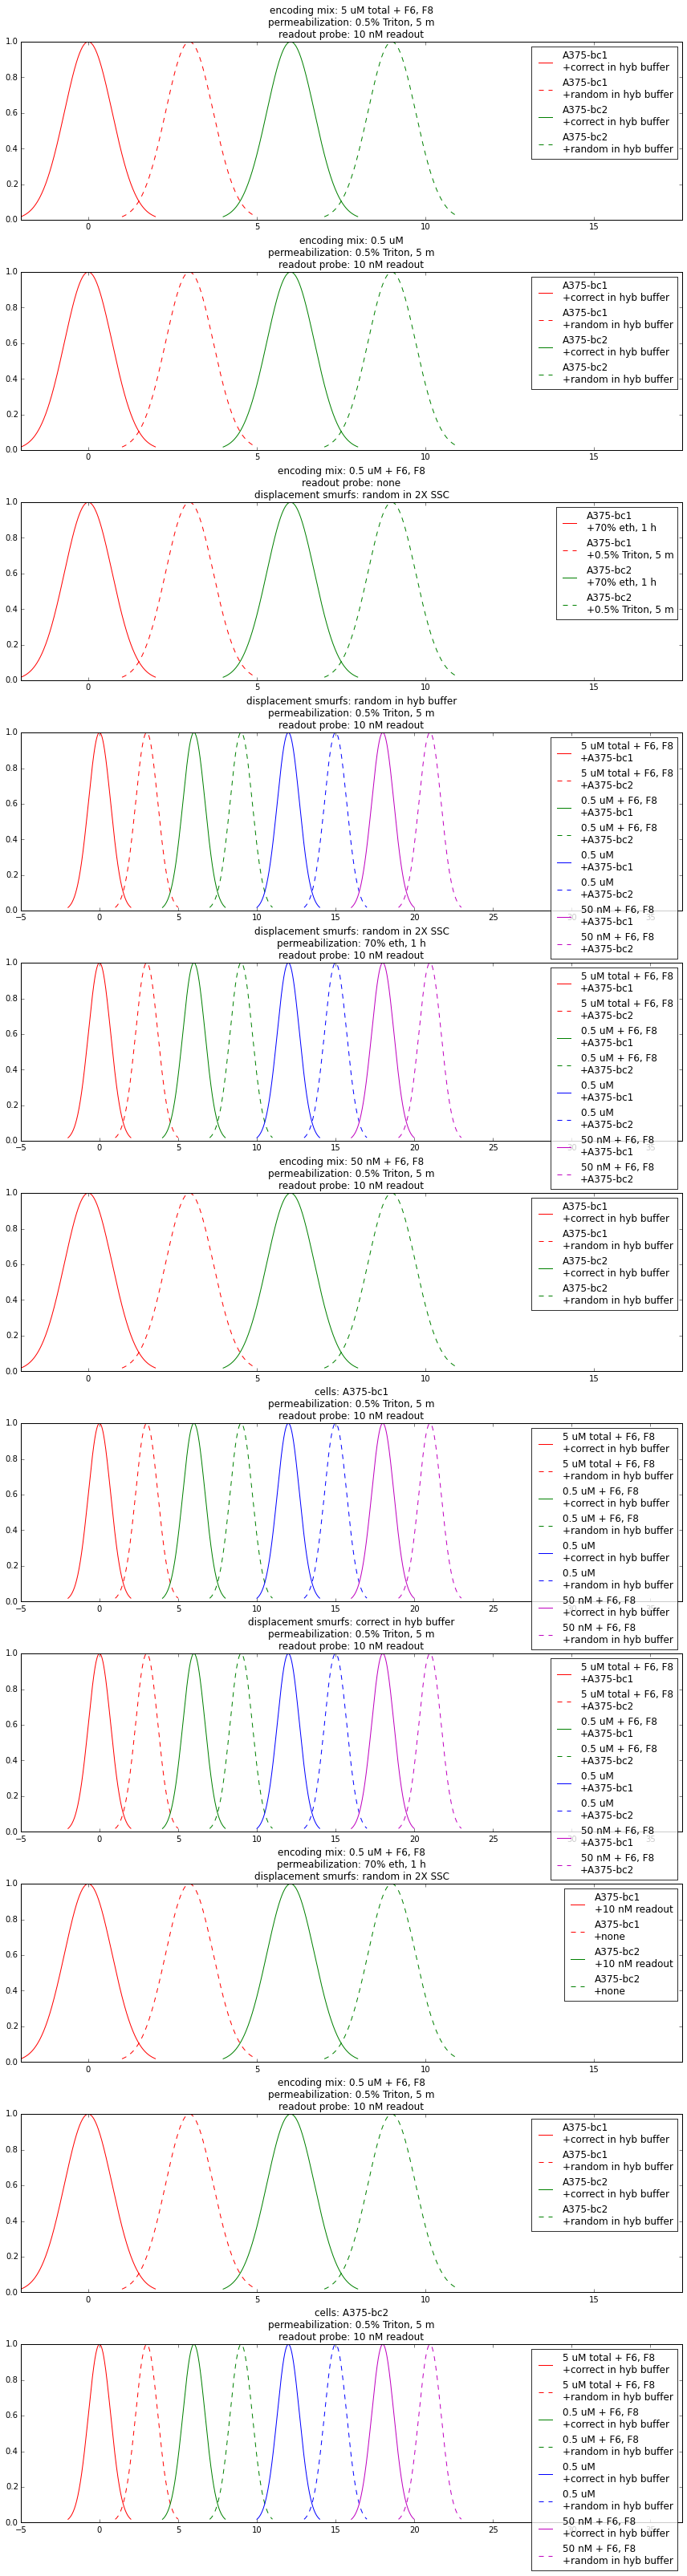

In [12]:
# SECOND ORDER
fig, axs = plt.subplots(nrows=len(comparisons2), ncols=1, figsize=(12,4*len(comparisons2)))

# fakedata
fake_x = np.arange(-2,2,0.01)
fake_y = np.array([np.exp(-1*x**2) for x in fake_x])

linestyles = ('-','--','-.')
colors = 'rgbm'

for comparison, ax in zip(named_comparisons2, axs.flatten()):
    ax.hold('on')
    variable = {k: v for d in comparison for k,v in d.items() 
            if len(v) > 1}
    constant = {k: v for d in comparison for k,v in d.items() 
                if len(v) == 1}
    
    vi = variable.items()
    p2 = product(vi[0][1], vi[1][1])
    for i,p in enumerate(p2):
        ls = linestyles[ vi[1][1].index(p[1])]
        color = colors[ vi[0][1].index(p[0])]
        ax.plot(fake_x+i*3, fake_y, label='\n+'.join(p), linestyle=ls, color=color)
        
    ax.legend().get_frame().set_alpha(0.8)
    t = ['%s: %s' % (a,b[0]) for a,b in constant.items()]
    ax.set_title('\n'.join(t))
    rng = ax.get_xlim()
    ax.set_xlim(rng[0],(rng[1]-rng[0])*1.4+rng[0])
fig.tight_layout()

### plots of first order comparisons

In [ ]:
# FIRST ORDER
fig, axs = plt.subplots(nrows=len(comparisons)/2, ncols=2, figsize=(14,2*len(comparisons)))

# fakedata
fake_x = np.arange(-2,2,0.01)
fake_y = np.array([np.exp(-1*x**2) for x in fake_x])


for comparison, ax in zip(named_comparisons, axs.flatten()):
    ax.hold('on')
    variable = {k: v for d in comparison for k,v in d.items() 
                if len(v) > 1}
    constant = {k: v for d in comparison for k,v in d.items() 
                if len(v) == 1}
    
    for i,value in enumerate(variable.values()[0]):
        ax.plot(fake_x+i*3, fake_y, label=value)
    ax.legend().get_frame().set_alpha(0.8)
    
    t = ['%s: %s' % (a,b[0]) for a,b in constant.items()]
    ax.set_title('\n'.join(t))
    rng = ax.get_xlim()
    ax.set_xlim(rng[0],(rng[1]-rng[0])*1.4+rng[0])
fig.tight_layout()

In [84]:
%%javascript
IPython.load_extensions('codefolding/main');